In [14]:
# import talib as ta
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
#import japanize_matplotlib

## 株価取得

In [15]:
#1
start = '2010-01-15'
end = '2023-01-14'
ticker = '^N225'
df = yf.download(tickers=ticker, start=start, end=end)
df.head()

/tmp/ipython-input-3807879733.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^N225,^N225,^N225,^N225,^N225
Date,,,,,
2010-01-15,10982.099609,10982.099609,10878.830078,10917.410156,252900000
2010-01-18,10855.080078,10895.099609,10781.030273,10887.610352,186600000
2010-01-19,10764.900391,10866.830078,10749.469727,10866.830078,174700000
2010-01-20,10737.519531,10860.929688,10724.570312,10834.910156,146400000
2010-01-21,10868.410156,10886.639648,10649.839844,10704.790039,176900000


## 前日との差分を取得

In [53]:
#2 前日との差分を計算
df['diff'] = df['Adj Close'].diff()
df.head()

KeyError: 'Adj Close'

In [17]:
#3　前日との差分が0以上であれば1、0未満であれば0とする。
df['diff_up_down'] = df['diff'].apply(lambda x: 1 if x >= 0 else 0)
df.head()

KeyError: 'diff'

In [18]:
# 参考
def updown(x):
    if x >= 0:
        return 1
    else:
        return 0

df['diff_up_down'] = df['diff'].apply(updown)

KeyError: 'diff'

## 陽線、陰線

In [19]:
#4 陽線の日を1、陰線の日を0にする。
df['today_up_down'] = df.apply(lambda x : 1 if (x['Close'] - x['Open']) >= 0 else 0, axis=1)
df.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## 単純移動平均●

In [20]:
#5 単純移動平均データフレームの作成
span05 = 5
span25 = 25
span50 = 50

# 5日移動平均
df['sma05'] = df['Adj Close'].rolling(window=span05).mean()
# 25日移動平均
df['sma25'] = df['Adj Close'].rolling(window=span25).mean()
# 50日移動平均
df['sma50'] = df['Adj Close'].rolling(window=span50).mean()
df.tail()

KeyError: 'Adj Close'

In [21]:
#5 単純移動平均線の可視化
date = df.index

plt.figure(figsize=(20, 5))
plt.plot(df['Adj Close'], label='N225')
plt.plot(date, df['sma05'], label='sma05')
plt.plot(date, df['sma25'], label='sma25')
plt.plot(date, df['sma50'], label='sma50')
plt.legend()
plt.show()

KeyError: 'Adj Close'

<Figure size 2000x500 with 0 Axes>

In [22]:
#5 単純移動平均線(talib:参考)
ta.SMA(df['Adj Close'], timeperiod=span05)
ta.SMA(df['Adj Close'], timeperiod=span25)
ta.SMA(df['Adj Close'], timeperiod=span50)

NameError: name 'ta' is not defined

## 指数移動平均●
- （当日含む直近N日間の終値の合計＋当日終値）➗(N日間＋1)

In [23]:
#6
span05 = 5
span25 = 25
span50 = 50

# 指数移動平均の作成
df['ema05'] = df['Adj Close'].ewm(span=span05, adjust=False).mean()
df['ema25'] = df['Adj Close'].ewm(span=span25, adjust=False).mean()
df['ema50'] = df['Adj Close'].ewm(span=span50, adjust=False).mean()
df.tail()

KeyError: 'Adj Close'

In [24]:
#6 指数移動平均線の可視化
date = df.index

plt.figure(figsize=(20, 5))
plt.plot(df['Adj Close'], label='N225')
plt.plot(date, df['ema05'], label='ema05')
plt.plot(date, df['ema25'], label='ema25')
plt.plot(date, df['ema50'], label='ema50')
plt.legend()
plt.show()

KeyError: 'Adj Close'

<Figure size 2000x500 with 0 Axes>

In [25]:
#6 指数移動平均線(talib:参考)
ta.EMA(df['Adj Close'], timeperiod=span05)
ta.EMA(df['Adj Close'], timeperiod=span25)
ta.EMA(df['Adj Close'], timeperiod=span50)

NameError: name 'ta' is not defined

## ボリンジャーバンド✖️
- 単純移動平均線　± 1標準偏差
- 単純移動平均線　± 2標準偏差
- 単純移動平均線　± 3標準偏差

In [26]:
#7 標準偏差を作成
std = df["sma25"].rolling(window=25).std()
std_1 = 1 * std
std_2 = 2 * std
std_3 = 3 * std

# ボリンジャーバンド
df['1upper'] = df['sma25'] + std_1
df['1lower'] = df['sma25'] - std_1
df['2upper'] = df['sma25'] + std_2
df['2lower'] = df['sma25'] - std_2
df['3upper'] = df['sma25'] + std_3
df['3lower'] = df['sma25'] - std_3
df.tail()

KeyError: 'sma25'

In [27]:
#7
date = df.index

plt.figure(figsize=(20, 5))
plt.plot(date, df['Adj Close'], marker='o')
plt.plot(date, df['1lower'], color='r', label= "-1σ")
plt.plot(date, df['1upper'], color='r', label= "1σ")
plt.plot(date, df['2lower'], color='b', label= "-2σ")
plt.plot(date, df['2upper'], color='b', label= "2σ")
plt.plot(date, df['3lower'], color='g', label= "-3σ")
plt.plot(date, df['3upper'], color='g', label= "3σ")
plt.legend()

KeyError: 'Adj Close'

<Figure size 2000x500 with 0 Axes>

In [28]:
# 移動平均線
df["SMA25"] = df["Adj Close"].rolling(window=25).mean()

# 標準偏差
df["std"] = df["SMA25"].rolling(window=25).std()

# ボリンジャーバンド
df['1upper'] = df['sma25'] + std_1
df['1lower'] = df['sma25'] - std_1
df["2upper"] = df["sma25"] + (2 * df["std"])
df["2lower"] = df["sma25"] - (2 * df["std"])
df["3upper"] = df["sma25"] + (3 * df["std"])
df["3lower"] = df["sma25"] - (3 * df["std"])

KeyError: 'Adj Close'

In [29]:
#7
date = df.index

plt.figure(figsize=(20, 5))
plt.plot(date, df['Adj Close'], marker='o')
plt.plot(date, df['1lower'], color='r', label= "-1σ")
plt.plot(date, df['1upper'], color='r', label= "1σ")
plt.plot(date, df['2lower'], color='b', label= "-2σ")
plt.plot(date, df['2upper'], color='b', label= "2σ")
plt.plot(date, df['3lower'], color='g', label= "-3σ")
plt.plot(date, df['3upper'], color='g', label= "3σ")
plt.legend()

KeyError: 'Adj Close'

<Figure size 2000x500 with 0 Axes>

## teraオリジナル
ダイバージェンスを計算

In [30]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,^N225,^N225,^N225,^N225,^N225
Date,,,,,
2010-01-15,10982.099609,10982.099609,10878.830078,10917.410156,252900000
2010-01-18,10855.080078,10895.099609,10781.030273,10887.610352,186600000
2010-01-19,10764.900391,10866.830078,10749.469727,10866.830078,174700000
2010-01-20,10737.519531,10860.929688,10724.570312,10834.910156,146400000
2010-01-21,10868.410156,10886.639648,10649.839844,10704.790039,176900000


In [31]:
# 日経平均株価を計算
close = df['Adj Close']

# MACDとシグナルラインを計算
fast_period = 12
slow_period = 26
signal_period = 9

macd = close.ewm(span=fast_period).mean() - close.ewm(span=slow_period).mean()
signal = macd.ewm(span=signal_period).mean()

# ダイバージェンスを計算
divergence = macd - signal

# 日経平均株価のグラフ
fig, ax = plt.subplots(figsize=(15, 6))

close.plot(ax=ax, label='Nikkei')
macd.plot(ax=ax, label='MACD', color='red')
signal.plot(ax=ax, label='Signal', color='green')

ax.set_title('Nikkei Divergence')
ax.legend(loc='best')

plt.show()

# ダイバージェンスグラフ
fig, ax = plt.subplots(figsize=(15, 6))

divergence.plot(ax=ax, label='Divergence')
ax.axhline(y=0, color='black', linestyle='--')

ax.set_title('Nikkei Divergence')
ax.legend(loc='best')

plt.show()


KeyError: 'Adj Close'

## Teraオリジナル
ライントレード

In [32]:
# 日経平均株価を計算
close = df['Adj Close']

# トレンドラインを計算
trend_window = 50
trend = close.rolling(window=trend_window).mean()

# サポートラインとレジスタンスラインを計算
support_window = 100
support = close.rolling(window=support_window).min()
resistance = close.rolling(window=support_window).max()

# トレンドライングラフ
fig, ax = plt.subplots(figsize=(15, 6))

close.plot(ax=ax, label='Nikkei')

ax.axhline(trend.mean(), color='red', label='Trend Line')
ax.axhline(support.mean(), color='green', label='Support Line')
ax.axhline(resistance.mean(), color='orange', label='Resistance Line')

ax.set_title('Nikkei Trend Line with Support and Resistance')
ax.legend(loc='best')

plt.show()

KeyError: 'Adj Close'

In [33]:
#7 ボリンジャーバンド(talib:参考) matype:0:単純、1:指数、2：加重
ta.BBANDS(df['Adj Close'], timeperiod=span25, nbdevup=1, nbdevdn=1, matype=0)
ta.BBANDS(df['Adj Close'], timeperiod=span25, nbdevup=2, nbdevdn=2, matype=0)
ta.BBANDS(df['Adj Close'], timeperiod=span25, nbdevup=3, nbdevdn=3, matype=0)

NameError: name 'ta' is not defined

TypeError: only length-1 arrays can be converted to Python scalars

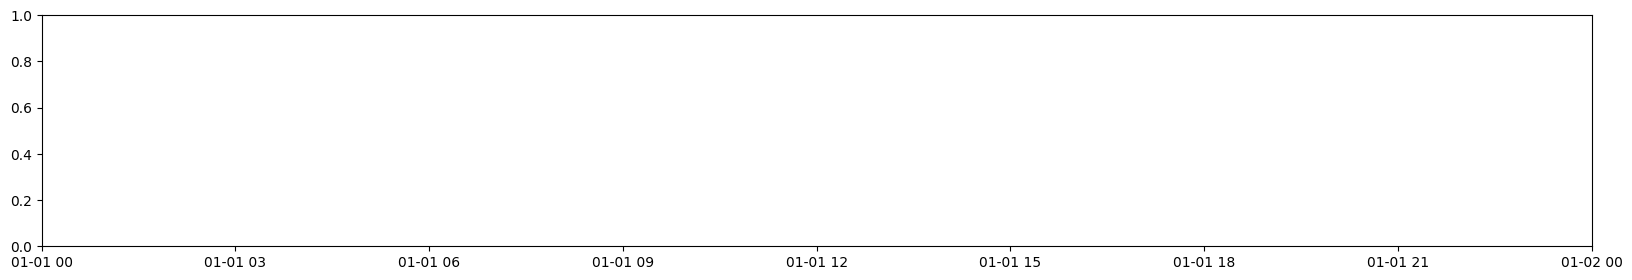

In [34]:
#8 出来高を棒グラフで表示
date = df.index
height = df['Volume']

plt.figure(figsize=(20, 3))
plt.bar(x=date, height=height, label='Volume')
plt.legend()
plt.show()

In [ ]:
# 9
# 陽線の日を青、陰線の日を赤にする。
# 陰線の日抽出
date_down = df[df['today_up_down']==0].index
height_down = df[df['today_up_down']==0]['Volume']
# 陽線の日抽出
date_up = df[df['today_up_down']==1].index
height_up = df[df['today_up_down']==1]['Volume']

plt.figure(figsize=(20, 3))
plt.bar(date_down, height_down, color='r')
plt.bar(date_up, height_up, color='b')
plt.show()

## RSI(Relative Strength Index)✖️
- 70%以上買われすぎ、30%以下売られすぎ
- RS = 期間中の平均上昇幅 ➗ 期間中の平均下落幅
- RSI = 100 - 100 ➗ (1+RS)

In [35]:
# 10
rsi_span =14
# 0以下のものは全て0に変換
plus = df['diff'].clip(lower=0).rolling(window=rsi_span).sum()

# 0以上は全て0に変換 マイナスになっているため、絶対値に変換
minus = df['diff'].clip(upper=0).rolling(window=rsi_span).sum().abs()
rs = plus / minus
df['rsi'] = 100 - (100 / (1 + rs))
df.tail()

KeyError: 'diff'

In [36]:
#10 RSIの可視化
date = df.index

plt.figure(figsize=(20, 3))
plt.plot(date, df['rsi'], label='rsi')
plt.hlines([30, 50, 70], date[0], date[-1], 'grey', linestyles='--')
plt.legend(fontsize=15)
plt.show()

KeyError: 'rsi'

<Figure size 2000x300 with 0 Axes>

In [37]:
#10 rsi:talib(参考)
ta.RSI(df['Adj Close'], timeperiod=14).tail()

NameError: name 'ta' is not defined

## MACD●
- MACD = 短期指数移動 - 長期指数移動（短期と長期の乖離幅）
- MACDシグナル = MACDの指数平滑移動平均線
- MACDヒスト = MACD - MACDシグナル
- 通常用いる期間、短期12、長期26、シグナル9
- macd=0は転換点
- 短期トレンド > 長期トレンド　上昇
- 長期トレンド < 短期トレンド　下落

In [38]:
# 11
short_span = 12
long_span = 26
signal_span = 9

# 短期指数移動平均(12日)を算出
ema_short = df['Adj Close'].ewm(span=short_span, adjust=False).mean()
# 長期移動指数平均(26日)を算出
ema_long = df['Adj Close'].ewm(span=long_span, adjust=False).mean()
# MACDを算出
df['macd'] = ema_short - ema_long
# MACDシグナル（MACDの指数移動平均（9日））を算出
df['macd_signal'] = df['macd'].ewm(span=signal_span, adjust=False).mean()
# MACDヒストを算出
df['macd_hist'] = df['macd'] - df['macd_signal']
df.tail()

KeyError: 'Adj Close'

In [39]:
# 11
plt.figure(figsize=(20, 3))
plt.plot(date, df['macd'], label='macd')
plt.plot(date, df['macd_signal'], label='macdsignal')
plt.bar(date, df['macd_hist'], label='macdhist')
plt.hlines(0, df.index[0], df.index[-1], linestyles='-', color='black')
plt.legend()

KeyError: 'macd'

<Figure size 2000x300 with 0 Axes>

In [40]:
#11 talib:参考
ta.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)

NameError: name 'ta' is not defined

## ATR(Average True Range)
ＴＲ（トゥルー・レンジ）
- 当日高値－当日安値
- 当日高値－前日終値
- 前日終値－当日安値<br>
以上のうち値が最大のもの<br>
ATRが上昇することでボラティリティが高くなっていると判断し、ATRが下降することでボラティリティが低くなっている

In [41]:
# 12
high_low = df['High'] - df['Low']
high_cp = (df['High'] - df['Adj Close'].shift()).abs()
cp_low = (df['Adj Close'].shift() - df['Low']).abs()
atr_span = 14

tr = np.max([high_low, high_cp, cp_low], axis=0)
df['atr'] = pd.Series(tr).rolling(window=atr_span).mean().values
df.tail()

KeyError: 'Adj Close'

In [42]:
# 12
date = df.index

plt.figure(figsize=(20, 3))
plt.plot(date, df["atr"], color="g", label="atr", )
plt.hlines(df["atr"].mean(), df.index[0], df.index[-1], linestyles=':', color='black')
plt.legend(fontsize=15)

KeyError: 'atr'

<Figure size 2000x300 with 0 Axes>

In [43]:
#12 ATR(talib:参考)
period = 14  # 任意の値を設定
ta.ATR(df['High'], df['Low'], df['Adj Close'], timeperiod=period)

NameError: name 'ta' is not defined

## ストキャスティクス✖️
- %K:当日終値 - 過去N日間の最安値 / 過去N日間の最高値 - 過去N日間の最安値 * 100
- %D:(最新の終値 - 過去N日間の最安値)のY日間の合計 / (過去N日間の最高値 - 過去N日間の最安値)のY日間の合計 * 100
- Slow%D = Z日の%Dの単純移動平均
- %Kと%Dの組み合わせをファストストキャスティクス
- %DとSlow%Dの組み合わせをスローストキャスティクス
- N:14、9、5
- Y:3
- Z:3

In [44]:
#13 ストキャスティクス
n = 5
adj_close = df['Adj Close']
# 期間中(5日間)の最低終値を取得
adj_close_n_min = df['Adj Close'].rolling(n).min()
# 期間中（5日間）の最高終値を取得
adj_close_n_max = df['Adj Close'].rolling(n).max()
# ④
c_min_3_sum = (adj_close - adj_close_n_min).rolling(3).sum()
# ⑤
max_min_3_sum = (adj_close_n_max - adj_close_n_min).rolling(3).sum()

# %Kを算出する。
df['%k'] = (adj_close - adj_close_n_min) / (adj_close_n_max - adj_close_n_min) * 100
# %Dを算出する。
df['%d'] = c_min_3_sum / max_min_3_sum * 100
# %slowDを算出する。
df['slow%d'] = df['%d'].rolling(3).mean()
df.tail()

KeyError: 'Adj Close'

In [45]:
# 13
date = df.index

plt.figure(figsize=(20, 3))
plt.plot(date, df['%k'], color='b', label='%K', linewidth=0.8)
plt.plot(date, df['%d'], color='r', label='%d', linewidth=0.8)
plt.plot(date, df['slow%d'], color='g', linestyle='-.', label='slow%d')
plt.legend()

KeyError: '%k'

<Figure size 2000x300 with 0 Axes>

In [46]:
# %K,%D(talib:参考)
ta.STOCHF(df['High'], df['Low'], df['Close'], fastk_period=5, fastd_period=3)

NameError: name 'ta' is not defined

In [47]:
# %D, Slow%D（talib:参考）
ta.STOCH(df['High'], df['Low'], df['Close'], fastk_period=5, slowk_period=3, slowd_period=3)

NameError: name 'ta' is not defined

## 全てを表示してみよう

KeyError: 'Adj Close'

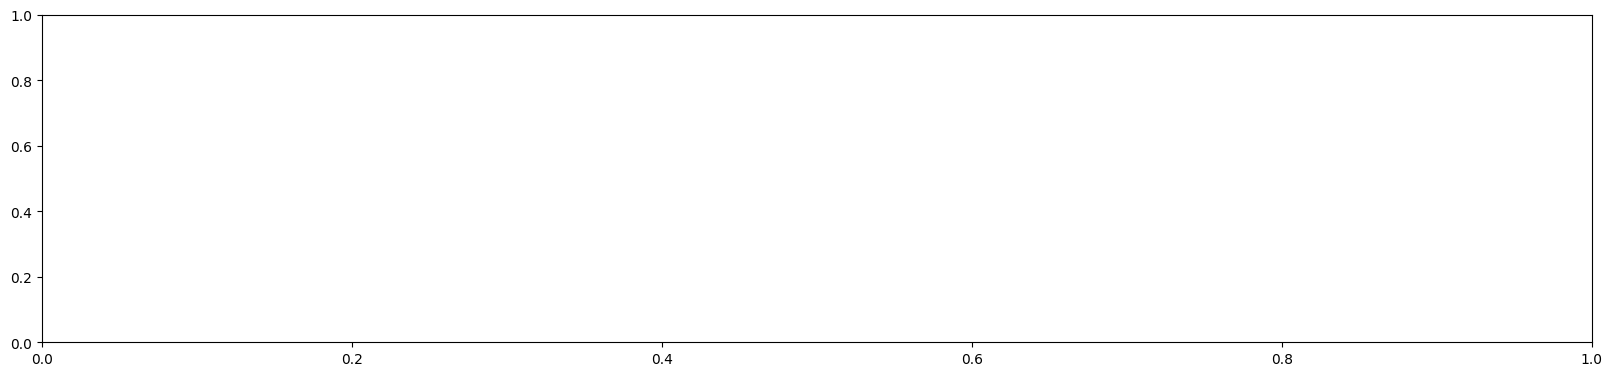

In [48]:
# 14
plt.figure(figsize=(20, 40))
plt.subplot(8, 1, 1)
plt.plot(df['Adj Close'], label='N225')
plt.plot(date, df['sma05'], label='sma05')
plt.plot(date, df['sma25'], label='sma25')
plt.plot(date, df['sma50'], label='sma50')
plt.legend()

plt.subplot(8, 1, 2)
plt.plot(df['Adj Close'], label='N225')
plt.plot(date, df['ema05'], label='ema05')
plt.plot(date, df['ema25'], label='ema25')
plt.plot(date, df['ema50'], label='ema50')
plt.legend()

plt.subplot(8, 1, 3)
plt.plot(df.index, df['Adj Close'], marker='o')
plt.plot(df.index, df['1lower'], color='r', label= "-1σ")
plt.plot(df.index, df['1upper'], color='r', label= "1σ")
plt.plot(df.index, df['2lower'], color='b', label= "-2σ")
plt.plot(df.index, df['2upper'], color='b', label= "2σ")
plt.plot(df.index, df['3lower'], color='g', label= "-3σ")
plt.plot(df.index, df['3upper'], color='g', label= "3σ")
plt.legend()

plt.subplot(8, 1, 4)
plt.bar(date_down, height_down, color='r')
plt.bar(date_up, height_up, color='b')

plt.subplot(8, 1, 5)
plt.plot(date, df['rsi'], label='rsi')
plt.hlines([30, 50, 70], date[0], date[-1], 'grey', linestyles='--')
plt.legend(fontsize=15)

plt.subplot(8, 1, 6)
plt.plot(df['macd'], label='macd')
plt.plot(df['macd_signal'], label='macdsignal')
plt.bar(df['macd_hist'].index, df['macd_hist'], label='macdhist')
plt.hlines(0, df.index[0], df.index[-1], linestyles='-', color='black')
plt.legend()

plt.subplot(8, 1, 7)
plt.plot(date, df["atr"], color="g", label="atr")
plt.hlines(df["atr"].mean(), df.index[0], df.index[-1], linestyles='--', color='black')

plt.subplot(8, 1, 8)
plt.plot(df.index, df['%k'], color='b', label='%K')
plt.plot(df.index, df['%d'], color='r', label='%d')
plt.plot(df.index, df['slow%d'], color='r', linestyle='--', label='slow%d')

## 応用編

In [49]:
# 15
def company_code(ticker, start, end):
    df = yf.download(tickers=ticker, start=start, end=end)

    date = df.index

    span05 = 5
    span25 = 25
    span50 = 50

    # 5日移動平均
    df['sma05'] = df['Adj Close'].rolling(window=span05).mean()
    # 25日移動平均
    df['sma25'] = df['Adj Close'].rolling(window=span25).mean()
    # 50日移動平均
    df['sma50'] = df['Adj Close'].rolling(window=span50).mean()

    plt.figure(figsize=(20, 10))
    plt.subplot(2, 1, 1)
    plt.plot(df['Adj Close'], label=ticker)
    plt.plot(date, df['sma05'], label='sma05')
    plt.plot(date, df['sma25'], label='sma25')
    plt.plot(date, df['sma50'], label='sma50')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.bar(x=date, height=df['Volume'], label='Volume')
    plt.legend()


/tmp/ipython-input-2624199170.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['6502.T']: YFTzMissingError('possibly delisted; no timezone found')


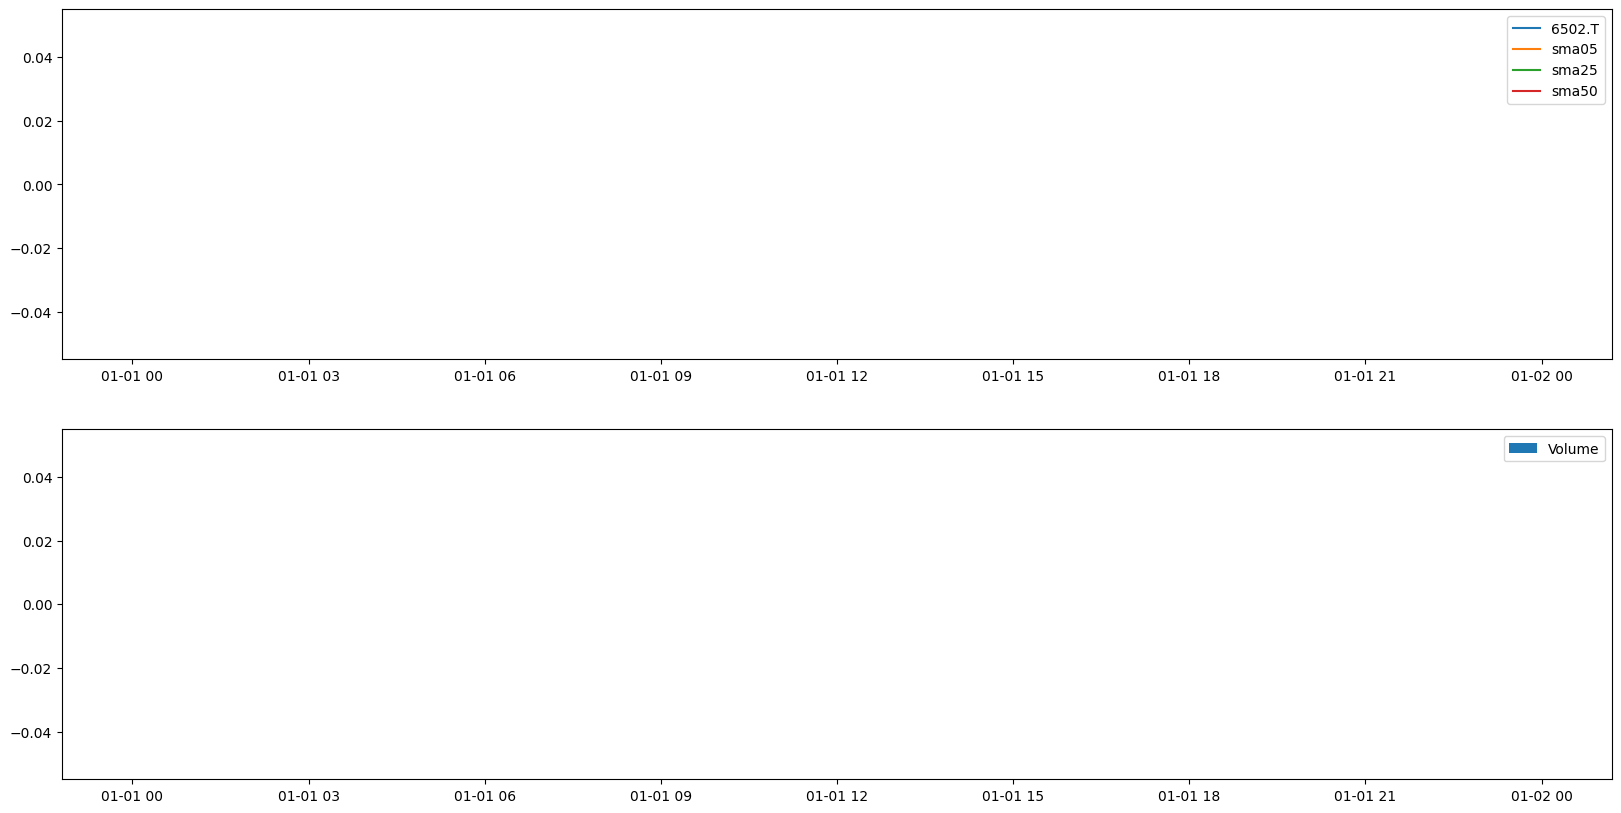

In [50]:
# 15
ticker = '6502.T'
start = '2020-01-01'
end = '2022-02-20'
company_code(ticker, start, end)

In [51]:
#16 株価取得から好きなだけ移動平均線を可視化する。
def sma_graph(*args, ticker='^N225', start='2022-01-01', end='2099-01-24'):

    df = yf.download(tickers=ticker, start=start, end=end)

    plt.figure(figsize=(20, 7))
    plt.plot(df['Adj Close'], linewidth=2)
    for i, j in enumerate(args):
        plt.plot(df['Adj Close'].rolling(window=j).mean())
    plt.title(ticker, fontsize=15)
    plt.legend(labels=args)
    plt.show()

In [52]:
# 16
ticker = '9983.T'
start = '2019-01-01'
end = '2023-02-05'

sma_graph(5, 25, 50, 100, 150, 180, ticker=ticker, start=start, end=end)

/tmp/ipython-input-1549029680.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


KeyError: 'Adj Close'

<Figure size 2000x700 with 0 Axes>

In [ ]:
# 17
def technical(ticker='^N225', start='2022-01-01', end='2099-01-24'):
    ticker = ticker
    start = start
    end = end

    df = yf.download(tickers=ticker, start=start, end=end)

    df['diff'] = df['Adj Close'].diff()
    df['diff_up_down'] = df['diff'].apply(lambda x: 1 if x >= 0 else 0)
    df['today_up_down'] = df.apply(lambda x : 1 if (x['Close'] - x['Open']) >= 0 else 0, axis=1)

    date = df.index


    def sma_graph(*args):
        plt.figure(figsize=(20, 5))
        plt.plot(date, df['Adj Close'], linewidth=2)
        for i, j in enumerate(args):
            plt.plot(date, df['Adj Close'].rolling(window=j).mean())
        plt.title(ticker, fontsize=15)
        plt.legend(labels=args)
        plt.show()

    def ema_graph(*args):
        plt.figure(figsize=(20, 5))
        plt.plot(date, df['Adj Close'], linewidth=2)
        for i, j in enumerate(args):
            plt.plot(date, df['Adj Close'].ewm(span=j, adjust=False).mean())
        plt.title(ticker, fontsize=15)
        plt.legend(labels=args)
        plt.show()


    def boriban_graph(n=25):
        df[f'sma_{n}'] = df['Adj Close'].rolling(window=n).mean()

        std = df[f'sma_{n}'].rolling(window=n).std()
        std_1 = 1 * std
        std_2 = 2 * std
        std_3 = 3 * std

        # ボリンジャーバンド
        df['1upper'] = df[f'sma_{n}'] + std_1
        df['1lower'] = df[f'sma_{n}'] - std_1
        df['2upper'] = df[f'sma_{n}'] + std_2
        df['2lower'] = df[f'sma_{n}'] - std_2
        df['3upper'] = df[f'sma_{n}'] + std_3
        df['3lower'] = df[f'sma_{n}'] - std_3

        plt.figure(figsize=(20, 5))
        plt.plot(date, df['Adj Close'], marker='o')
        plt.plot(date, df['1lower'], color='r', label= "-1σ")
        plt.plot(date, df['1upper'], color='r', label= "1σ")
        plt.plot(date, df['2lower'], color='b', label= "-2σ")
        plt.plot(date, df['2upper'], color='b', label= "2σ")
        plt.plot(date, df['3lower'], color='g', label= "-3σ")
        plt.plot(date, df['3upper'], color='g', label= "3σ")
        plt.legend()
        plt.show()


    def volume_graph():
        date_down = df[df['today_up_down']==0].index
        height_down = df[df['today_up_down']==0]['Volume']
        date_up = df[df['today_up_down']==1].index
        height_up = df[df['today_up_down']==1]['Volume']
        plt.figure(figsize=(20, 3))
        plt.bar(date_down, height_down, color='r')
        plt.bar(date_up, height_up, color='b')
        plt.show()


    def rsi_graph(n=14):
        plus = df['diff'].clip(lower=0).rolling(window=n).sum()
        minus = df['diff'].clip(upper=0).rolling(window=n).sum().abs()
        rs = plus / minus
        df['rsi'] = 100 - (100 / (1 + rs))

        plt.figure(figsize=(20, 3))
        plt.plot(date, df['rsi'], label='rsi')
        plt.hlines([30, 50, 70], date[0], date[-1], 'grey', linestyles='--')
        plt.legend(fontsize=15)
        plt.show()


    def macd_graph(s_span=12, l_span=26, signal_span=9):
        short_span = s_span
        long_span = l_span
        signal_span = signal_span

        ema_short = df['Adj Close'].ewm(span=short_span, adjust=False).mean()
        ema_long = df['Adj Close'].ewm(span=long_span, adjust=False).mean()
        df['macd'] = ema_short - ema_long
        df['macd_signal'] = df['macd'].ewm(span=signal_span, adjust=False).mean()
        df['macd_hist'] = df['macd'] - df['macd_signal']

        plt.figure(figsize=(20, 3))
        plt.plot(date, df['macd'], label='macd')
        plt.plot(date, df['macd_signal'], label='macdsignal')
        plt.bar(date, df['macd_hist'], label='macdhist')
        plt.hlines(0, df.index[0], df.index[-1], linestyles='-', color='black')
        plt.legend()

    def atr_graph(atr_span=14):
        high_low = df['High'] - df['Low']
        high_cp = (df['High'] - df['Adj Close'].shift()).abs()
        cp_low = (df['Adj Close'].shift() - df['Low']).abs()
        atr_span = atr_span

        tr = np.max([high_low, high_cp, cp_low], axis=0)
        df['atr'] = pd.Series(tr).rolling(window=atr_span).mean().values

        plt.figure(figsize=(20, 3))
        plt.plot(date, df["atr"], color="g", label="atr")
        plt.hlines(df["atr"].mean(), df.index[0], df.index[-1], linestyles=':', color='black')
        plt.legend()


    def stoch_graph(k_day=5, d_day=3, slow_day=3):
        k_day = k_day
        d_day = d_day
        slow_day = slow_day

        adj_close = df['Adj Close']
        adj_close_n_min = df['Adj Close'].rolling(k_day).min()
        adj_close_n_max = df['Adj Close'].rolling(k_day).max()
        df['%k'] = (adj_close - adj_close_n_min) / (adj_close_n_max - adj_close_n_min) * 100

        df['%d'] = (adj_close - adj_close_n_min).rolling(d_day).sum() / (adj_close_n_max - adj_close_n_min).rolling(d_day).sum() * 100
        df['slow%d'] = df['%d'].rolling(slow_day).mean()
        plt.figure(figsize=(20, 3))
        plt.plot(date, df['%k'], color='b', label='%K', linewidth=0.8)
        plt.plot(date, df['%d'], color='r', label='%d', linewidth=0.7)
        plt.plot(date, df['slow%d'], color='g', linestyle='-.', label='slow%d')
        plt.legend()

    return sma_graph, ema_graph, boriban_graph, volume_graph, rsi_graph, macd_graph, atr_graph, stoch_graph

In [ ]:
#17-1 ファーストリティリングの移動平均線と出来高とストキャスを確認したいな〜
ticker = '9983.T'
start = '2021-01-01'
end = '2023-02-05'

graph = technical(ticker, start, end)
# 単純移動平均線25日、50日、100日の呼び出し
graph[0](25, 50, 100)
# 出来高の呼び出し
graph[3]()
# rsi25日の呼び出し
graph[4](25)

In [ ]:
##17-2 やっぱりボリンジャーバンドとatrとストキャスを見てみたいな〜
ticker = '9983.T'
start = '2022-01-01'
end = '2023-02-05'

graph = technical(ticker, start, end)
# ボリンジャーバンド25日線の呼び出し
graph[2](25)
# macd(基準どおり)の呼び出し
graph[5]()
# ATR25日の呼び出し
graph[6](25)